# Exploration of CRF weigths

In [44]:
%pylab inline

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sb

Populating the interactive namespace from numpy and matplotlib


Reminder of the update rule:

$$
\left\{
    \begin{array}{ll}
        q_{i1} = sig(\delta_i) \\
        q_{i0} = sig(-\delta_i)
    \end{array}
\right.
\text{with }
\delta_i = \phi_{i1} - \phi_{i0} + \sum_j{q_{j0}\psi_{ij0} + q_{j1}\psi_{ij1}}
$$


Loading labels signification

In [45]:
file = open("Charades_v1_classes.txt","r")
labels_signification = []
s = file.readline()[5:-1]
while s != "":
    labels_signification.append(s)
    s = file.readline()[5:-1]

* Semi-CRF

In [46]:
STEP = "600000"
psi_0 = np.load("experiments/charades/semi-crf/psi_0_" + STEP + ".npy")
psi_1 = np.load("experiments/charades/semi-crf/psi_1_" + STEP + ".npy")

In [47]:
psi_0 = np.reshape(psi_0, (157,157))
psi_1 = np.reshape(psi_1, (157,157))

# Exploration of $\psi_1$

(0, 1150)

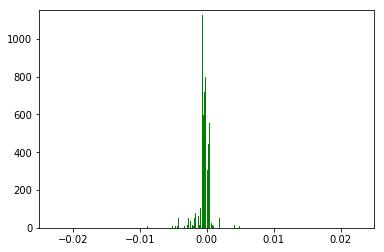

In [48]:
n, bins, patches = plt.hist(psi_1, 50, normed=1, facecolor='green')#, alpha=0.75)
plt.xlim(-0.025, 0.025)
plt.ylim(0,1150)

Proportion of potentials bigger than $0.004$ in absolute value:

In [64]:
np.shape(np.where(np.abs(psi_1)>0.004))[1]/(157**2 - 157)

0.011350645108606892

Weights of $\psi_1$ grater than $threshold$: we print $(i,j)$ such that $\psi_{ij1} > threshold$.

*Interpretation:* the **occurence of $j$** detected by the original classifier **activates the occurence of $i$** ($occ(j) \implies occ(i)$)

In [65]:
threshold = 0.004
rows , cols = np.where(psi_1>threshold)

for i in range(len(rows)):
    print((labels_signification[rows[i]],labels_signification[cols[i]]))
    print(psi_1[rows[i],cols[i]])

('Washing a table', 'Tidying up a table')
0.0044944175
('Holding a phone/camera', 'Playing with a phone/camera')
0.010193737
('Holding some food', 'Watching television')
0.0054303287
('Putting some food somewhere', 'Tidying up a closet/cabinet')
0.0043526418
('Taking food from somewhere', 'Sitting on sofa/couch')
0.004229979
('Holding a blanket', 'Sitting on sofa/couch')
0.0056563667
('Throwing a broom somewhere', 'Holding a broom')
0.0041797087
('Holding a cup/glass/bottle of something', 'Sitting in a bed')
0.0047160755
('Holding a dish', 'Wash a dish/dishes')
0.0041875625
('Holding a dish', 'Watching television')
0.0047241542
('Laughing at television', 'Watching television')
0.0041374583
('Watching television', 'Sitting on sofa/couch')
0.006176015


Weights of $\psi_1$ lower than $threshold$: we print $(i,j)$ such that $\psi_{ij1} < threshold$.

*Interpretation:* the **occurence of $j$** detected by the original classifier **deactivates the occurence of $i$** ($occ(j) \implies \neg occ(i)$)

In [67]:
threshold = -0.004
rows , cols = np.where(psi_1<threshold)

for i in range(len(rows)):
    print((labels_signification[rows[i]],labels_signification[cols[i]]))
    print(psi_1[rows[i],cols[i]])

('Holding some clothes', 'Holding a blanket')
-0.0042144875
('Holding some clothes', 'Snuggling with a blanket')
-0.0044805133
('Closing a door', 'Opening a door')
-0.0045799627
('Closing a door', 'Walking through a doorway')
-0.0048003285
('Opening a door', 'Walking through a doorway')
-0.0043181577
('Putting something on a table', 'Sitting at a table')
-0.0049297707
('Putting something on a table', 'Sitting in a chair')
-0.0056996522
('Sitting at a table', 'Working at a table')
-0.006943899
('Sitting at a table', 'Watching a laptop or something on a laptop')
-0.0049825446
('Sitting at a table', 'Working/Playing on a laptop')
-0.0058621913
('Sitting at a table', 'Sitting on sofa/couch')
-0.0057123266
('Sitting at a table', 'Sitting on the floor')
-0.006820228
('Tidying up a table', 'Sitting at a table')
-0.008105719
('Tidying up a table', 'Working at a table')
-0.004422747
('Tidying up a table', 'Sitting in a chair')
-0.0068417685
('Working at a table', 'Sitting at a table')
-0.004175

Heatmap

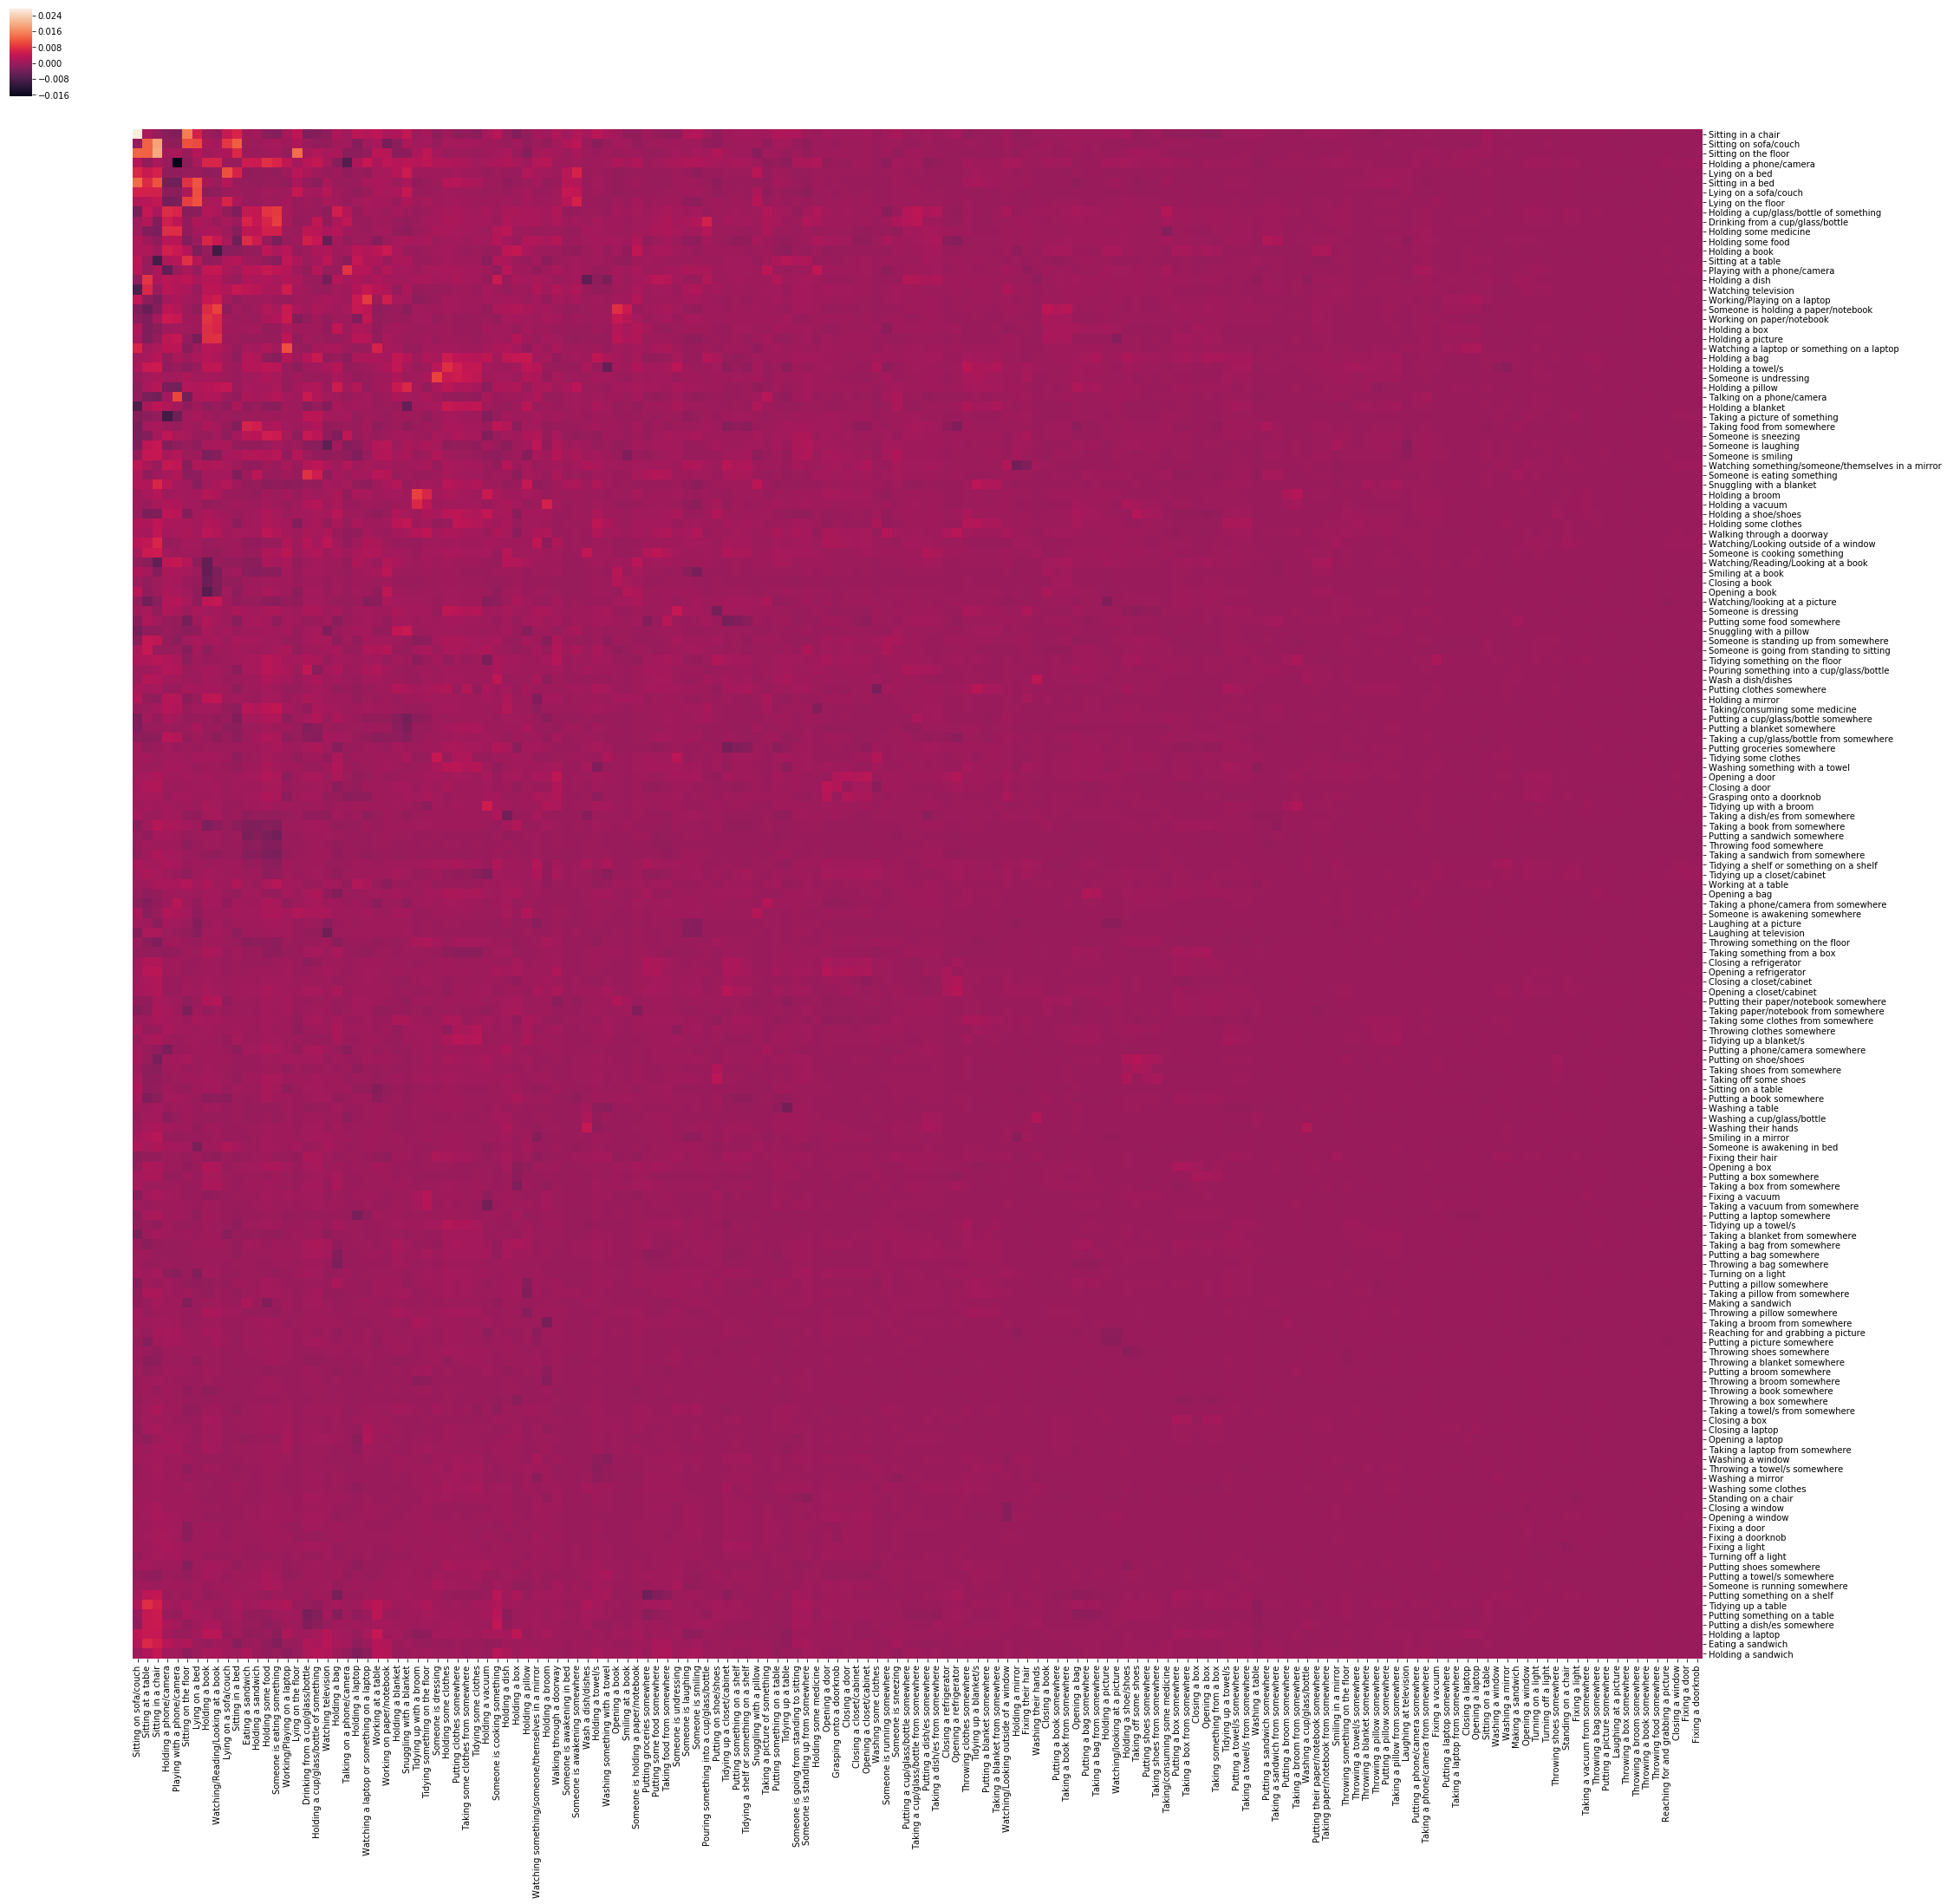

In [18]:
cg = sb.clustermap(-psi_1,
              method='average',
              xticklabels=labels_signification,
              yticklabels=labels_signification,
              figsize=(35,35))
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)

<center>
    <font color='#3e0e4c'>■ $occ(j) \implies \neg occ(i)$ </font>
    
    <font color='#ffdb00'>■ $occ(j) \implies occ(i)$ </font>
</center>

# Exploration of $\psi_0$

(0, 1150)

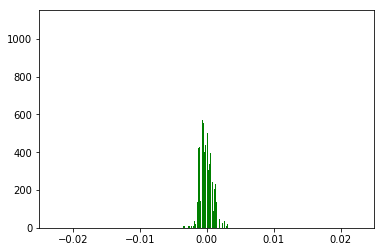

In [68]:
n, bins, patches = plt.hist(psi_0, 50, normed=1, facecolor='green')#, alpha=0.75)
plt.xlim(-0.025, 0.025)
plt.ylim(0,1150)

Proportion of potentials bigger than $0.004$ in absolute value:

In [71]:
np.shape(np.where(np.abs(psi_0)>0.004))[1]/(157**2 - 157)

0.008982524906091785

Weights of $\psi_0$ grater than $threshold$: we print $(i,j)$ such that $\psi_{ij0} > threshold$.

*Interpretation:* the **non-occurence of $j$** detected by the original classifier **activates the occurence of $i$** ($\neg occ(j) \implies occ(i)$)

In [73]:
threshold = 0.004
rows , cols = np.where(psi_0>threshold)

for i in range(len(rows)):
    print((labels_signification[rows[i]],labels_signification[cols[i]]))
    print(psi_0[rows[i],cols[i]])

('Opening a door', 'Walking through a doorway')
0.004718133
('Putting something on a table', 'Sitting at a table')
0.0042871796
('Putting something on a table', 'Sitting in a chair')
0.005057464
('Sitting at a table', 'Working at a table')
0.006286491
('Sitting at a table', 'Watching a laptop or something on a laptop')
0.004325119
('Sitting at a table', 'Working/Playing on a laptop')
0.005204897
('Sitting at a table', 'Sitting on sofa/couch')
0.005054577
('Sitting at a table', 'Sitting on the floor')
0.00616224
('Tidying up a table', 'Sitting at a table')
0.0070243897
('Tidying up a table', 'Sitting in a chair')
0.005760576
('Working at a table', 'Sitting at a table')
0.0044171214
('Working at a table', 'Watching a laptop or something on a laptop')
0.0051378747
('Working at a table', 'Sitting in a chair')
0.0053086085
('Holding a phone/camera', 'Holding a book')
0.00901705
('Holding a phone/camera', 'Watching/Reading/Looking at a book')
0.0091186
('Holding a phone/camera', 'Holding som

Weights of $\psi_0$ lower than $threshold$: we print $(i,j)$ such that $\psi_{ij0} < threshold$.

*Interpretation:* the **non-occurence of $j$** detected by the original classifier **deactivates the occurence of $i$** ($\neg occ(j) \implies \neg occ(i)$)

In [74]:
threshold = -0.004
rows , cols = np.where(psi_0<threshold)

for i in range(len(rows)):
    print((labels_signification[rows[i]],labels_signification[cols[i]]))
    print(psi_0[rows[i],cols[i]])

('Washing a table', 'Tidying up a table')
-0.005034179
('Holding a phone/camera', 'Playing with a phone/camera')
-0.010721008
('Holding a phone/camera', 'Talking on a phone/camera')
-0.004072514
('Throwing a bag somewhere', 'Holding a bag')
-0.004233726
('Holding a book', 'Watching/Reading/Looking at a book')
-0.004710466
('Holding a shoe/shoes', 'Sitting at a table')
-0.0043052053
('Sitting in a chair', 'Holding a phone/camera')
-0.0045208186
('Sitting in a chair', 'Playing with a phone/camera')
-0.004221184
('Sitting in a chair', 'Holding a book')
-0.005306214
('Sitting in a chair', 'Watching/Reading/Looking at a book')
-0.0048040473
('Sitting in a chair', 'Putting on shoe/shoes')
-0.0045641605
('Holding some food', 'Watching television')
-0.0063595674
('Putting some food somewhere', 'Putting something on a shelf')
-0.0040107872
('Putting some food somewhere', 'Tidying up a closet/cabinet')
-0.0052321716
('Putting some food somewhere', 'Sitting on sofa/couch')
-0.004768037
('Taking f

Heatmap

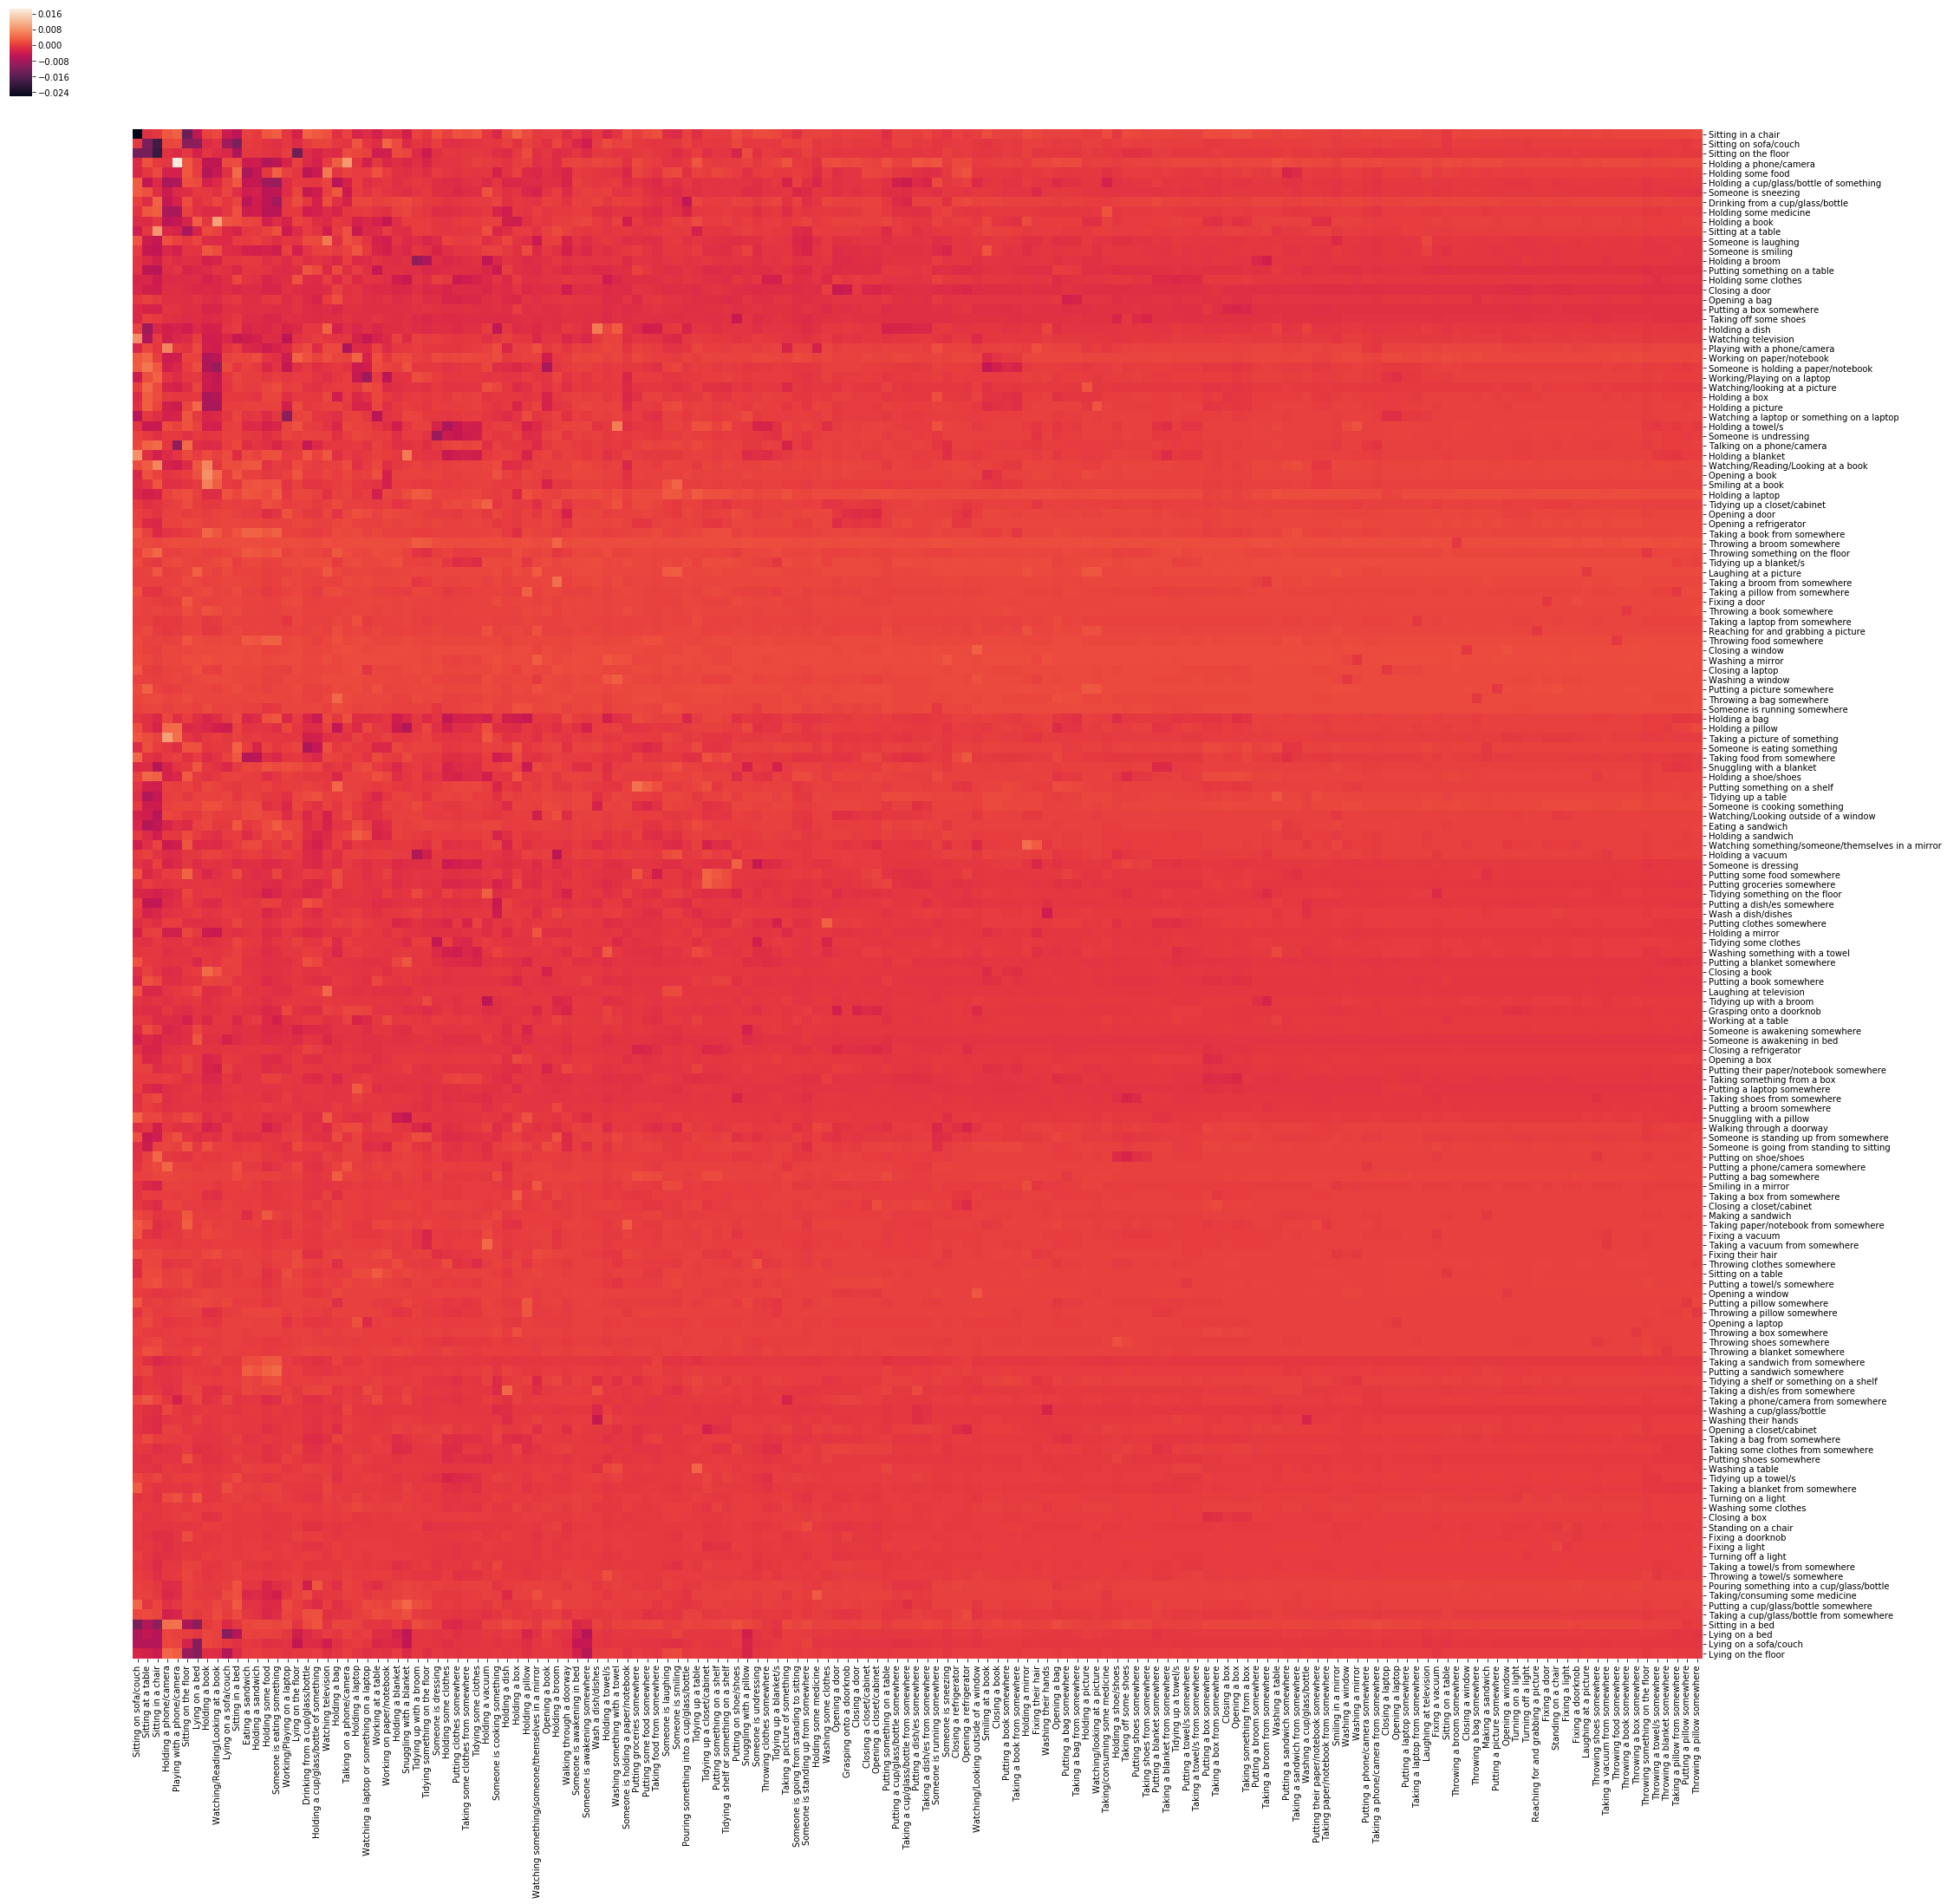

In [25]:
cg = sb.clustermap(-psi_0,
              method='average',
              xticklabels=labels_signification,
              yticklabels=labels_signification,
              figsize=(35,35))
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)

<center>
    <font color='#3e0e4c'>■ $\neg occ(j) \implies \neg occ(i)$ </font>
    
    <font color='#ffdb00'>■ $\neg occ(j) \implies occ(i)$ </font>
</center>

## Specific couple of labels:

* Biggest (positive) values of $\psi'_{ij0}$ campaign for  higher value of $P(Y_i=1|Y_j=0)$
* Lowest (negative) values of $\psi'_{ij0}$ campaign for  higher value of $P(Y_i=0|Y_j=0)$

* Biggest (positive) values of $\psi'_{ij1}$ campaign for  higher value of $P(Y_i=1|Y_j=1)$
* Lowest (negative) values of $\psi'_{ij1}$ campaign for  higher value of $P(Y_i=0|Y_j=1)$

In [20]:
def print_relations(label_1, label_2):
    for k in range(157):
        if labels_signification[k] == label_1:
            i = k
        elif labels_signification[k] == label_2:
            j = k
            
    print("psi_0(" + label_1 + ", " + label_2 + ") =", psi_0[i, j])
    print("psi_1(" + label_1 + ", " + label_2 + ") =", psi_1[i, j])
    
    print("psi_0(" + label_2 + ", " + label_1 + ") =", psi_0[j, i])
    print("psi_1(" + label_2 + ", " + label_1 + ") =", psi_1[j, i])

In [84]:
print_relations('Holding some clothes', 'Tidying up a closet/cabinet')

psi_0(Holding some clothes, Tidying up a closet/cabinet) = 0.00043773494
psi_1(Holding some clothes, Tidying up a closet/cabinet) = -0.0009616656
psi_0(Tidying up a closet/cabinet, Holding some clothes) = -0.0008950929
psi_1(Tidying up a closet/cabinet, Holding some clothes) = 0.0004884343


In [ ]:
Holding a broom - 0.53
2.Sitting in a chair - 0.28
3.Sitting on the floor

In [85]:
a = 1
try :
    a = a/0
except:
    print("div 0")

div 0


In [86]:
a

1